In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
from lmfit import Model
import pandas
import numpy as np
from matplotlib.pyplot import *
import resonator_model

In [6]:
#you don't actually fit for these, so just make functions
def get_qi(Q, Q_e_real):
    return (Q**-1 - Q_e_real**-1)**-1

def get_br(Q, f_0):
    return f_0*(2 * Q)**-1

In [19]:
#here's some data
data = np.load('single_res_data.npz')

In [22]:
real_res = data['real']
imag_res = data['imag']
freqs_res = data['freqs']

In [25]:
#fit the model
result = resonator_model.full_fit(freqs_res, real_res, imag_res)

In [33]:
result.best_values

{'A_mag': 0.063102108190736958,
 'A_slope': -3.4891572267615451e-09,
 'Q': 29758.871642306131,
 'Q_e_imag': 6082.2403337843716,
 'Q_e_real': 47549.732229519293,
 'delay': 6.0554817401039131e-08,
 'f_0': 5082027358.4349289,
 'f_min': 5082482274.2150612,
 'phi': -0.49273770901294256}

In [34]:
#get the other parameters
Qi = get_qi(result.best_values['Q'], result.best_values['Q_e_real'])
br = get_br(result.best_values['Q'], result.best_values['f_0'])

In [35]:
#lets make a fine version of the model to plot
f_fine = arange(min(freqs_res), max(freqs_res), 100)
fine_s21 = resonator_model.fine_s21_model(f_fine, result.best_values)

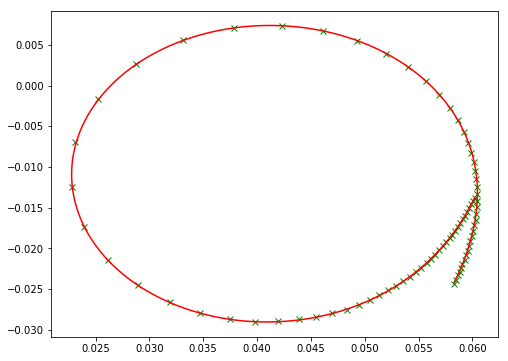

In [36]:
figure(figsize = (8,6))
plot(real_res, imag_res, 'x', color = 'g', label = '$\mathrm{freq.\ sweep\ data}$')
#plot(result.best_fit.real, result.best_fit.imag, color = 'r', label = '$\mathrm{S_{21}\ model}$')
plot(fine_s21.real, fine_s21.imag, color = 'r', label = '$\mathrm{S_{21}\ model}$')